In [2]:
import numpy as np
import pandas as pd
import os
import random
from PIL import Image
import cv2

In [3]:
image_path = os.path.join("/content/drive/MyDrive/Vin Deep Learning/train/")
mask_path = os.path.join("/content/drive/MyDrive/Vin Deep Learning/mask/")

In [4]:
images = os.listdir(image_path)
mask = os.listdir(mask_path)
mask = [fName.split(".png")[0] for fName in mask]

In [5]:
print("Số image trong file train: ",len(images))
print("Số mask trong file mask: ",len(mask))

Số image trong file train:  96
Số mask trong file mask:  96


In [6]:
test_files =  set(os.listdir(image_path)) & set(os.listdir(mask_path))

##tạo list id của mask
l_mask = list(test_files) #+ [x + '.png' for x in mask] 
l_mask.sort()

#tạo list id của image
#l_img = [x.split('_mask')[0] for x in check]
l_img =  list(test_files) #+ [x + '.png' for x in mask]
l_img.sort()

In [7]:
l_mask[0]

'020717d6ab0b440b37978d9bace9f9b2.png'

In [8]:
df = pd.DataFrame()
df['images'] = l_img
df['mask'] = l_mask
df['images'] = image_path + df['images']
df['mask'] = mask_path + df['mask']

In [9]:
train_im_path = df['images'].tolist()
train_mask_path = df['mask'].tolist()


In [10]:
train_im_path[0:10]

['/content/drive/MyDrive/Vin Deep Learning/train/020717d6ab0b440b37978d9bace9f9b2.png',
 '/content/drive/MyDrive/Vin Deep Learning/train/05d676834dbed1639cb5eea70c1e307b.png',
 '/content/drive/MyDrive/Vin Deep Learning/train/061fa33f6ba0028fbbad8caaeac8d145.png',
 '/content/drive/MyDrive/Vin Deep Learning/train/064023f1ff95962a1eee46b9f05f7309.png',
 '/content/drive/MyDrive/Vin Deep Learning/train/0d30dc1e0070e7a934f39452e3ad3b83.png',
 '/content/drive/MyDrive/Vin Deep Learning/train/0e21abbef40e569be72ab0ad90544f87.png',
 '/content/drive/MyDrive/Vin Deep Learning/train/0e8d3736396b615c0798033f37e4a481.png',
 '/content/drive/MyDrive/Vin Deep Learning/train/0f45742c4d100eeee221f8853d79c9d4.png',
 '/content/drive/MyDrive/Vin Deep Learning/train/106a3da41d2e3d9f508c09b28e8abdaf.png',
 '/content/drive/MyDrive/Vin Deep Learning/train/1b6b4e0d7f5f7d7ad2bf8b70783244be.png']

In [11]:
def image_preprocessing(im, mask):
  Rimg = cv2.imread(im)
  Rmask = cv2.imread(mask, cv2.IMREAD_GRAYSCALE)
  size = Rmask.shape
  Rimg = cv2.resize(Rimg,size)
  return Rimg, Rmask

Text(0.5, 0.98, 'Chest X-rays, Red: Pneumothorax.')

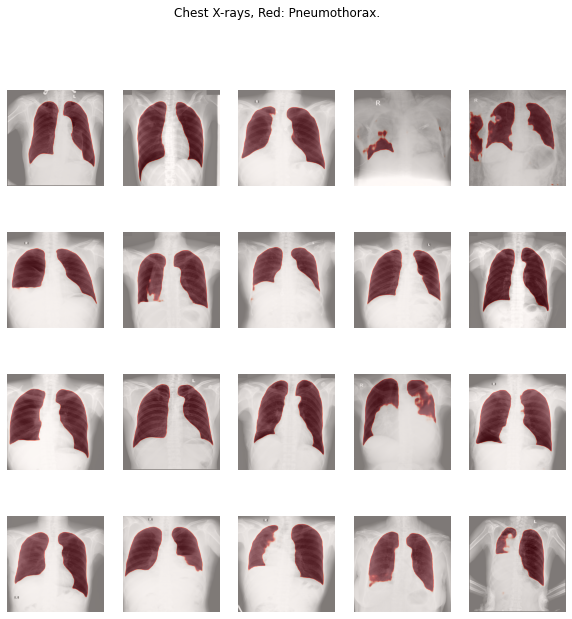

In [12]:
import matplotlib.pyplot as plt

images,masks = train_im_path[0:20], train_mask_path[0:20]
max_images = 20
grid_width = 5
grid_height = int(max_images / grid_width)
fig, axs = plt.subplots(grid_height, grid_width, figsize=(10, 10))

for i,(im, mask) in enumerate(zip(images,masks)):
    ax = axs[int(i / grid_width), i % grid_width]
    read_img, read_mask = image_preprocessing(im, mask)
    #read_img = cv2.imread(im)
    ax.imshow(read_img, cmap="bone")
    #read_mask = cv2.imread(mask)
    ax.imshow(read_mask, alpha=0.5, cmap="Reds")    
    ax.axis('off')
plt.suptitle("Chest X-rays, Red: Pneumothorax.")

In [13]:
for i,(im, mask) in enumerate(zip(images,masks)):
  print (im)
  print(mask)

/content/drive/MyDrive/Vin Deep Learning/train/020717d6ab0b440b37978d9bace9f9b2.png
/content/drive/MyDrive/Vin Deep Learning/mask/020717d6ab0b440b37978d9bace9f9b2.png
/content/drive/MyDrive/Vin Deep Learning/train/05d676834dbed1639cb5eea70c1e307b.png
/content/drive/MyDrive/Vin Deep Learning/mask/05d676834dbed1639cb5eea70c1e307b.png
/content/drive/MyDrive/Vin Deep Learning/train/061fa33f6ba0028fbbad8caaeac8d145.png
/content/drive/MyDrive/Vin Deep Learning/mask/061fa33f6ba0028fbbad8caaeac8d145.png
/content/drive/MyDrive/Vin Deep Learning/train/064023f1ff95962a1eee46b9f05f7309.png
/content/drive/MyDrive/Vin Deep Learning/mask/064023f1ff95962a1eee46b9f05f7309.png
/content/drive/MyDrive/Vin Deep Learning/train/0d30dc1e0070e7a934f39452e3ad3b83.png
/content/drive/MyDrive/Vin Deep Learning/mask/0d30dc1e0070e7a934f39452e3ad3b83.png
/content/drive/MyDrive/Vin Deep Learning/train/0e21abbef40e569be72ab0ad90544f87.png
/content/drive/MyDrive/Vin Deep Learning/mask/0e21abbef40e569be72ab0ad90544f87.pn

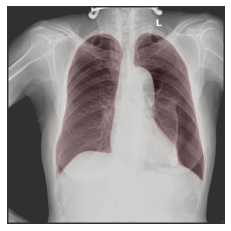

In [14]:
img1 = cv2.imread("/content/drive/MyDrive/Vin Deep Learning/train/020717d6ab0b440b37978d9bace9f9b2.png")
mask1 = cv2.imread("/content/drive/MyDrive/Vin Deep Learning/mask/020717d6ab0b440b37978d9bace9f9b2.png", cv2.IMREAD_GRAYSCALE)
img1 = cv2.resize(img1,mask1.shape)
plt.imshow(img1, cmap="bone")
plt.imshow(mask1,alpha=0.2, cmap="Reds")
plt.axis('off')
plt.savefig('test.png')

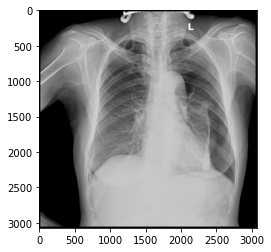

In [15]:
img1 = cv2.imread("/content/drive/MyDrive/Vin Deep Learning/train/020717d6ab0b440b37978d9bace9f9b2.png")
plt.imshow(img1, cmap="bone")


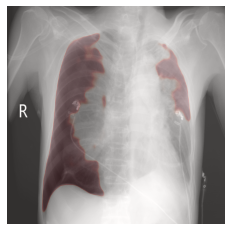

In [17]:
images,masks = train_im_path, train_mask_path

for i,(im, mask) in enumerate(zip(images,masks)):
  Rimg, Rmask = image_preprocessing(im, mask)
  plt.imshow(Rimg, cmap="bone")
  plt.imshow(Rmask,alpha=0.2, cmap="Reds")
  plt.axis("off")
  path = im.replace('/content/drive/MyDrive/Vin Deep Learning/train/','')
  plt.savefig('/content/drive/MyDrive/Vin Deep Learning/image mask/' + path)